## Prueba #0503

### "Aumento de datos"

#### Responda las siguientes preguntas proporcionando código Python:
#### Objetivos:
- Codifique las funciones de ayuda.
- Optimice y pruebe un modelo predictivo de su elección.
- Realice aumentos de datos para mejorar la precisión predictiva cuando los datos de entrenamiento proporcionados son pequeños.

In [1]:
import numpy as np
import pandas as pd
import os
import warnings
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn import metrics, preprocessing
from scipy.ndimage.interpolation import rotate
warnings.filterwarnings(action='ignore')                  # Desactivar las advertencias
%matplotlib inline

#### Leer los datos:
La explicación de los datos originales se puede encontrar [aquí](http://yann.lecun.com/exdb/mnist/).
- Los datos que usaremos son un pequeño subconjunto de los datos originales con solo 100 observaciones.
- Cada observación es la versión "aplanada" de una imagen.
- La primera columna corresponde a la etiqueta (Y).
- El tamaño de la imagen es 28x28.

In [3]:
# Ir al directorio dónde se ecuentra el fichero 
os.chdir(r'./Data')                # Reemplazar por la ruta adecuada

In [30]:
# Lea los datos de entrenamiento y prueba por separado.
data_train = pd.read_csv('data_mnist_train_100.csv', header=None,encoding='latin1')
data_test = pd.read_csv('data_mnist_test_100.csv', header=None,encoding='latin1')

# Escale y divida el conjunto de datos en X e Y.
X_train = np.array((data_train.iloc[:,1:]/255.0)*0.99+0.01)
X_test = np.array((data_test.iloc[:,1:]/255.0)*0.99+0.01)
Y_train = np.array(data_train.iloc[:,0])
Y_test = np.array(data_test.iloc[:,0])

1). Codifique la función auxiliar 'show_data ()' que visualiza cada observación dada. SUGERENCIA: use matplotlib.pyplot.imshow () y scipy.ndimage.interpolation ().

In [90]:
def show_data(X, Y, n, angle=0):
        image = X[n]
        image = image.reshape((28, 28)) #Establecemos el tamaño de la imagen
        image = rotate(image, angle, reshape=False)
        plt.figure()
        plt.imshow(image, cmap=plt.get_cmap('gray_r'))
        plt.show()

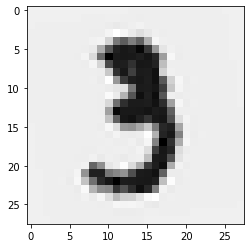

In [91]:
# Ejemplo 1.
show_data(X_train, Y_train,10,+10)

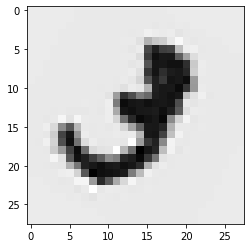

In [92]:
# Ejemplo 2.
show_data(X_train, Y_train,10,-30)

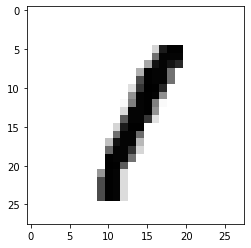

In [87]:
# Ejemplo 3.
show_data(X_train, Y_train,77,0)

2). Elija un algoritmo y realice el análisis predictivo.
- Optimizar los hiperparámetros.
- Calcule la precisión.
- ¿Es la precisión lo suficientemente alta?

In [7]:
       # <Tu código va aquí>

3). Codifique la función auxiliar 'rotate_data ()' que rota cada observación dada en un ángulo. SUGERENCIA: use scipy.ndimage.interpolation ().

In [10]:
       # <Tu código va aquí>

4). Aumente el conjunto de datos de entrenamiento.
- Aumente el tamaño del conjunto de datos de entrenamiento al introducir ligeras rotaciones (en sentido horario y antihorario).
- Utilice la función 'rotate_data ()' definida en el paso anterior.
- No es necesario aumentar el conjunto de datos de prueba.
- Objetivo aproximadamente cinco veces mayor.

In [11]:
       # <Tu código va aquí>

5). Rehaga el análisis predictivo con el conjunto de datos de entrenamiento aumentado.
- Utilice el mismo algoritmo que en el paso 2).
- Calcule la precisión.
- ¿Ha aumentado la precisión?

In [1]:
       # <Tu código va aquí>